<a href="https://colab.research.google.com/github/taah155929-svg/Machine-learning-Project/blob/main/Another_copy_of_Phase1_ML_True_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import  LabelEncoder, FunctionTransformer ,StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import joblib
import os
from datetime import datetime

# **1) - Data Understanding**




#**Read Data**

In [ ]:
data = pd.read_csv('/content/mushroom.csv')

#**Randam Sample data**

In [ ]:
df= data.copy()
df.sample(8).T

,4119,17191,6003,5260,24085,23480,8308,15469
class,e,p,e,p,e,p,e,e
cap-shape,b,k,x,x,NaN,k,x,f
cap-surface,y,g,f,y,f,y,NaN,g
cap-color,NaN,e,g,n,e,g,n,w
ruises,f,t,t,t,f,t,t,f
odor,n,f,n,y,n,f,s,NaN
gill-attachment,f,f,a,f,f,f,f,f
gill-spacing,w,w,NaN,c,c,c,c,NaN
gill-size,b,NaN,b,b,b,b,n,b
gill-color,b,w,n,b,b,n,b,NaN


#**Size of Data**

In [ ]:
df.shape

(25986, 23)

#**Information of data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25986 entries, 0 to 25985
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     25986 non-null  object
 1   cap-shape                 22513 non-null  object
 2   cap-surface               22507 non-null  object
 3   cap-color                 22527 non-null  object
 4   ruises                    22514 non-null  object
 5   odor                      22536 non-null  object
 6   gill-attachment           22505 non-null  object
 7   gill-spacing              22587 non-null  object
 8   gill-size                 22494 non-null  object
 9   gill-color                22418 non-null  object
 10  stalk-shape               22512 non-null  object
 11  stalk-root                22458 non-null  object
 12  stalk-surface-above-ring  22478 non-null  object
 13  stalk-surface-below-ring  22563 non-null  object
 14  stalk-color-above-ring

#**Names of columns**

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'ruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')





#**Check Description**


In [ ]:
data.describe().T

,count,unique,top,freq
class,25986,2,e,14354
cap-shape,22513,6,x,7674
cap-surface,22507,4,y,7602
cap-color,22527,10,n,4810
ruises,22514,2,f,12361
odor,22536,9,n,6986
gill-attachment,22505,2,f,17811
gill-spacing,22587,2,c,16092
gill-size,22494,2,b,13997
gill-color,22418,12,b,3679


#**Number of Unique Columns**




In [ ]:
df.nunique()

,0
class,2
cap-shape,6
cap-surface,4
cap-color,10
ruises,2
odor,9
gill-attachment,2
gill-spacing,2
gill-size,2
gill-color,12


#**Check Balance Of Data**

In [ ]:
df["class"].value_counts()

,count
class,
e,14354
p,11632


# **2) - Data Cleaning**

#**Check for missing values and impute**

In [ ]:
df.replace(['?', 'NaN'], np.nan, inplace=True)
missing_counts = df.isna().sum()
missing_counts = missing_counts[missing_counts > 0]
print("Missing values count per column:")
print(missing_counts)

Missing values count per column:
cap-shape                   3473
cap-surface                 3479
cap-color                   3459
ruises                      3472
odor                        3450
gill-attachment             3481
gill-spacing                3399
gill-size                   3492
gill-color                  3568
stalk-shape                 3474
stalk-root                  9584
stalk-surface-above-ring    3508
stalk-surface-below-ring    3423
stalk-color-above-ring      3573
stalk-color-below-ring      3433
veil-type                   3497
veil-color                  3503
ring-number                 3489
ring-type                   3508
spore-print-color           3493
population                  3511
habitat                     3484
dtype: int64


In [ ]:
print("🔹 Missing Values Replacement Report 🔹")
print("="*50)

for column in df.columns:
    missing_count = df[column].isna().sum()

    if missing_count > 0:
        if df[column].dtype in ['float64', 'int64']:
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
            print(f"{column:<25} → {missing_count} missing replaced with mean: {mean_value}")
        else:
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
            print(f"{column:<25} → {missing_count} missing replaced with mode: '{mode_value}'")

print("\n✅ Missing values after handling:")
print(df.isna().sum())


🔹 Missing Values Replacement Report 🔹
cap-shape                 → 3473 missing replaced with mode: 'x'
cap-surface               → 3479 missing replaced with mode: 'y'
cap-color                 → 3459 missing replaced with mode: 'n'
ruises                    → 3472 missing replaced with mode: 'f'
odor                      → 3450 missing replaced with mode: 'n'
gill-attachment           → 3481 missing replaced with mode: 'f'
gill-spacing              → 3399 missing replaced with mode: 'c'
gill-size                 → 3492 missing replaced with mode: 'b'
gill-color                → 3568 missing replaced with mode: 'b'
stalk-shape               → 3474 missing replaced with mode: 't'
stalk-root                → 9584 missing replaced with mode: 'b'
stalk-surface-above-ring  → 3508 missing replaced with mode: 's'
stalk-surface-below-ring  → 3423 missing replaced with mode: 's'
stalk-color-above-ring    → 3573 missing replaced with mode: 'w'
stalk-color-below-ring    → 3433 missing replaced wi

/tmp/ipython-input-382207043.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


In [ ]:
df.sample(5).T

,15084,15847,1070,11186,14548
class,e,e,e,p,e
cap-shape,x,b,x,f,x
cap-surface,y,g,f,s,f
cap-color,w,w,r,e,n
ruises,t,f,f,f,f
odor,l,n,n,f,y
gill-attachment,f,f,a,f,f
gill-spacing,w,c,w,w,w
gill-size,b,n,b,n,b
gill-color,p,h,k,o,b


In [ ]:
df.head().T

,0,1,2,3,4
class,e,p,e,e,e
cap-shape,x,x,b,x,x
cap-surface,f,y,y,g,f
cap-color,n,g,n,g,n
ruises,f,t,t,t,t
odor,n,n,n,n,n
gill-attachment,f,f,f,f,a
gill-spacing,w,c,c,w,w
gill-size,n,b,b,b,n
gill-color,b,k,n,n,n


#**Detect and drop duplicate rows**


In [ ]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


# **3)-EDA (Exploratory Data Analysis)**

#**1. Univariate Analysis**

1.3 Count plots for Categorical Features

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


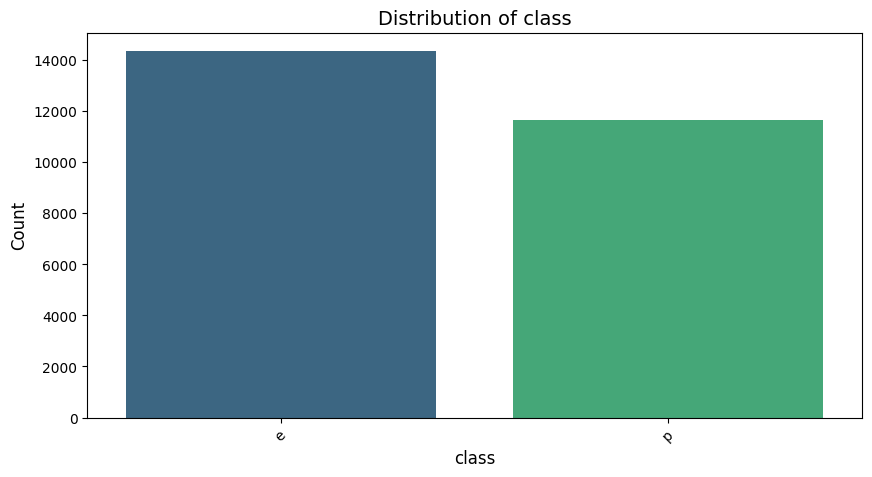

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


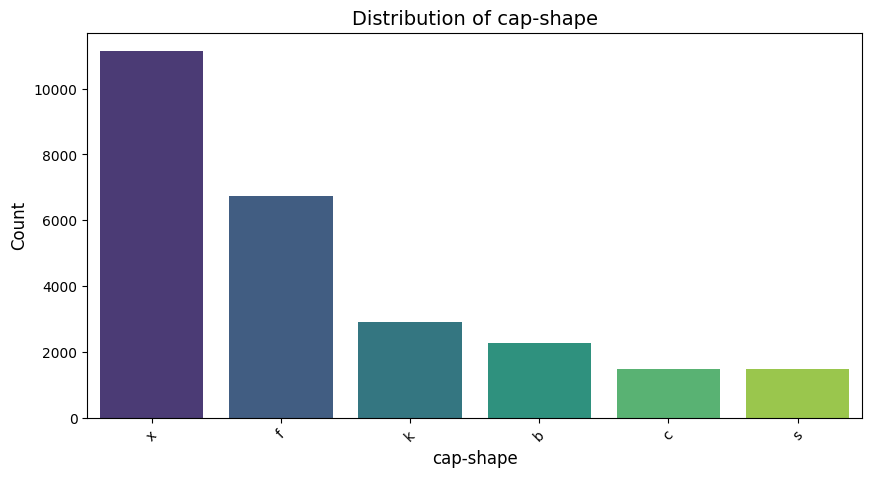

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


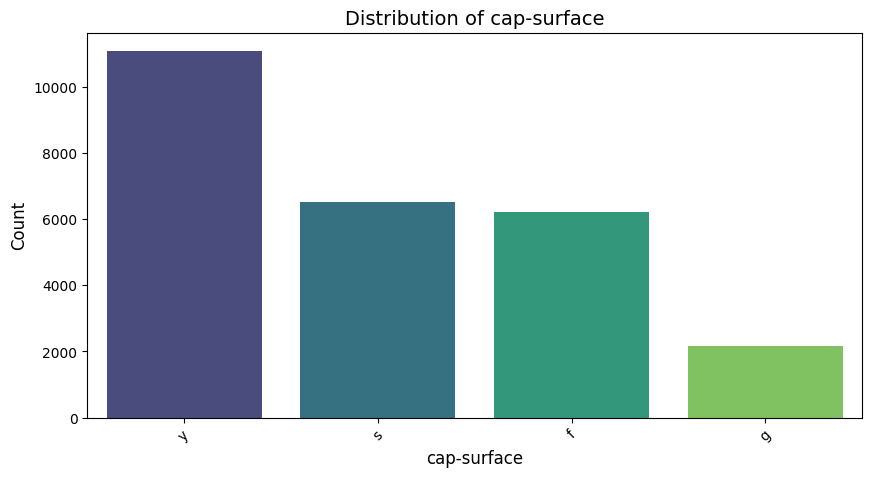

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


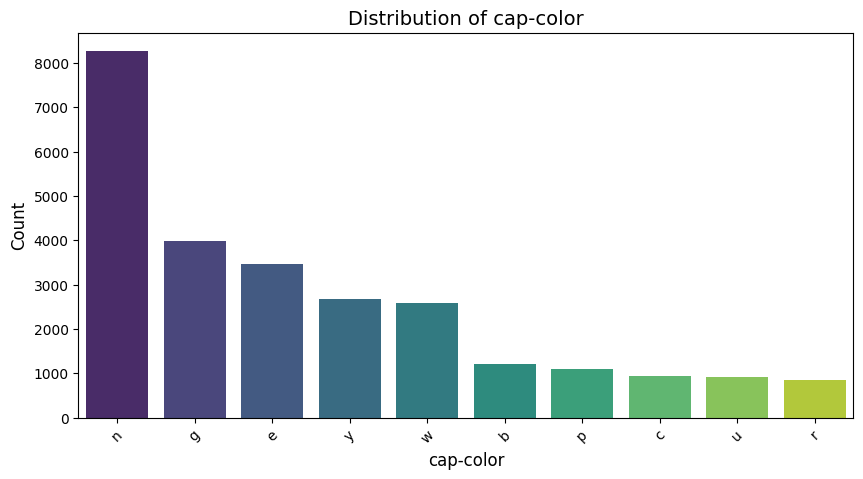

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


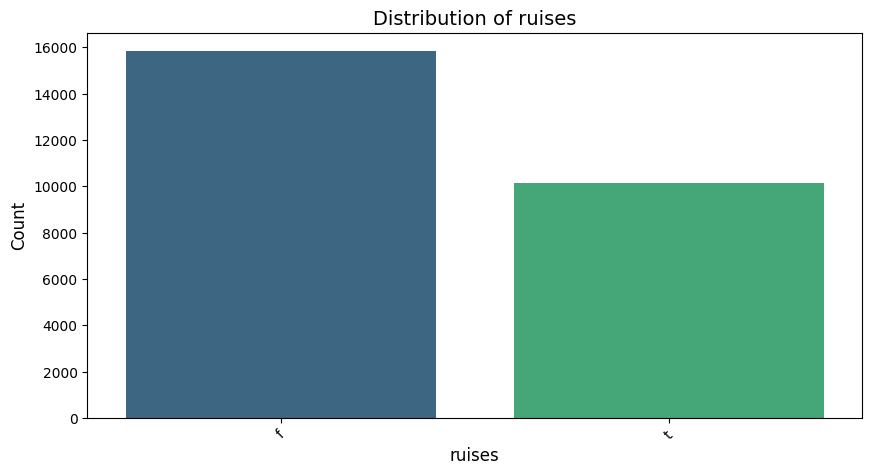

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


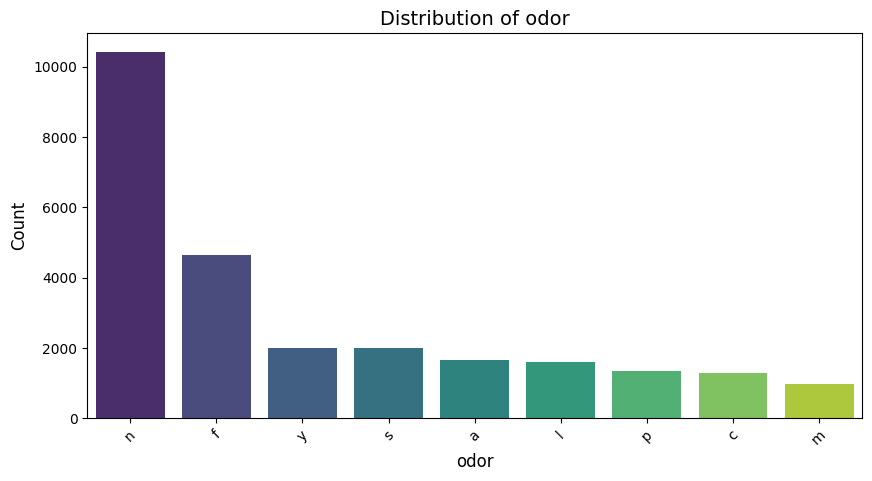

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


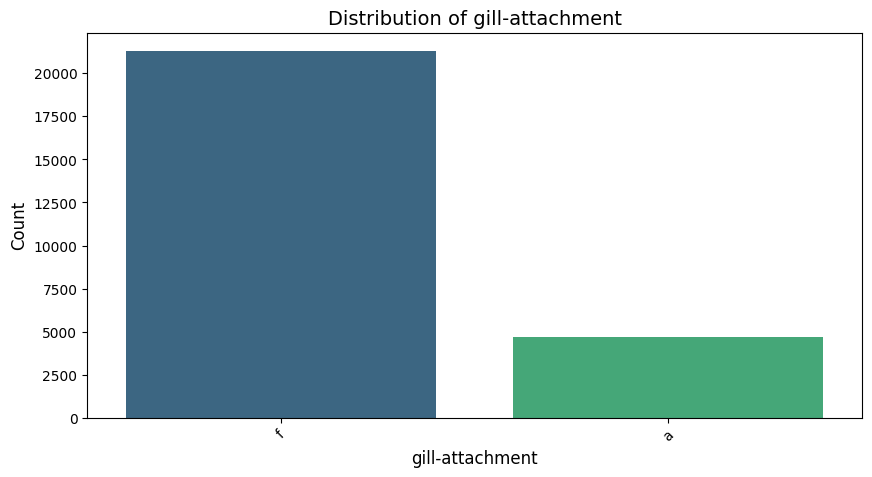

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


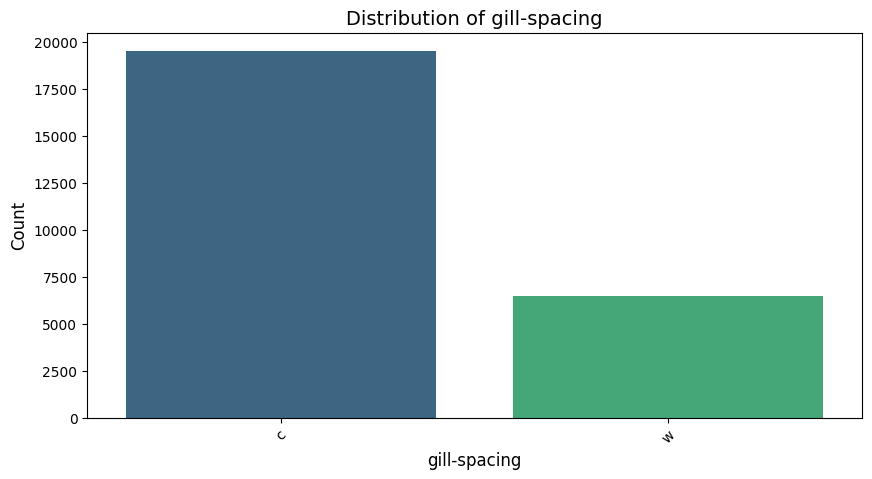

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


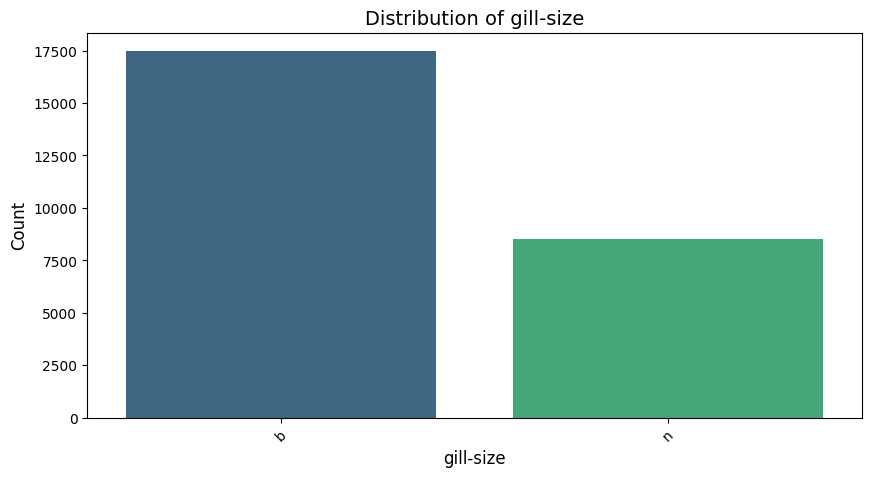

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


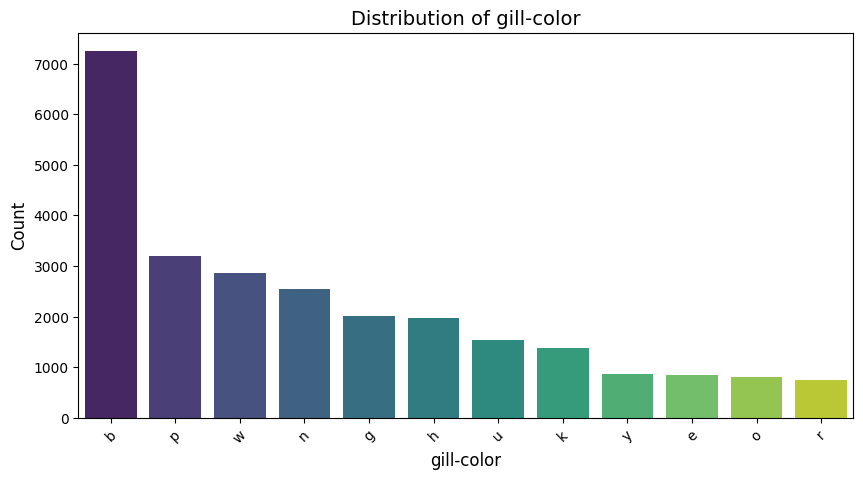

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


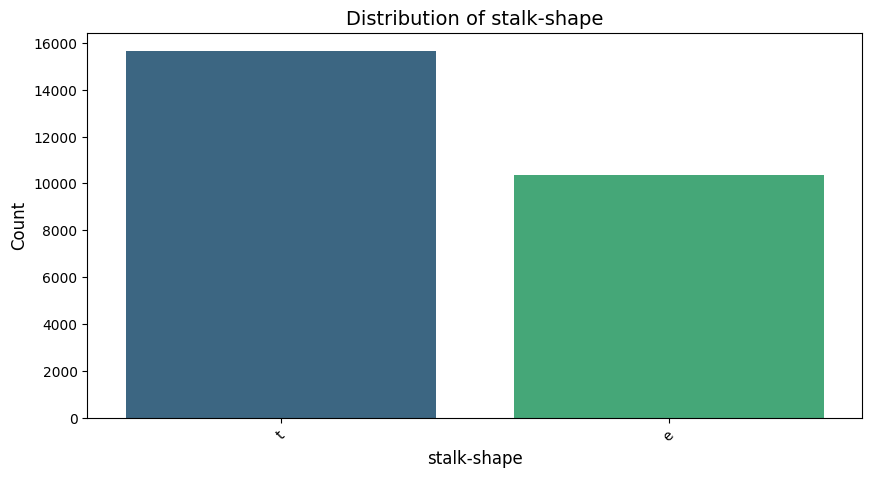

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


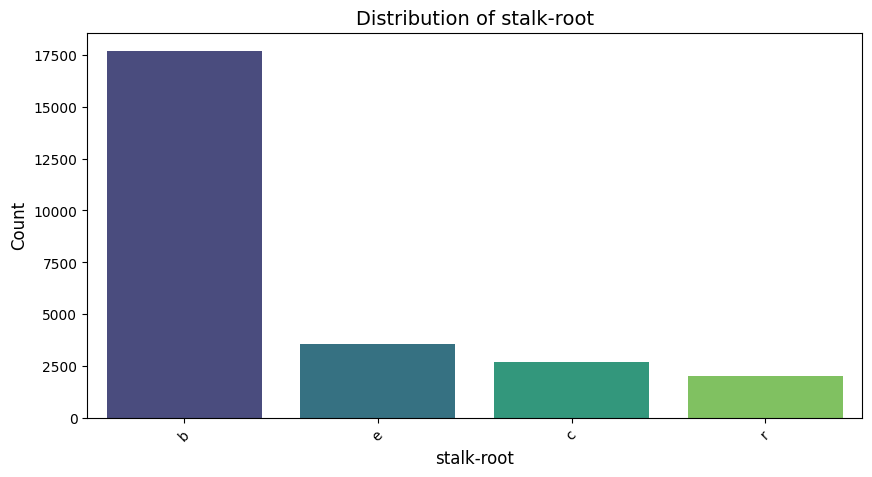

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


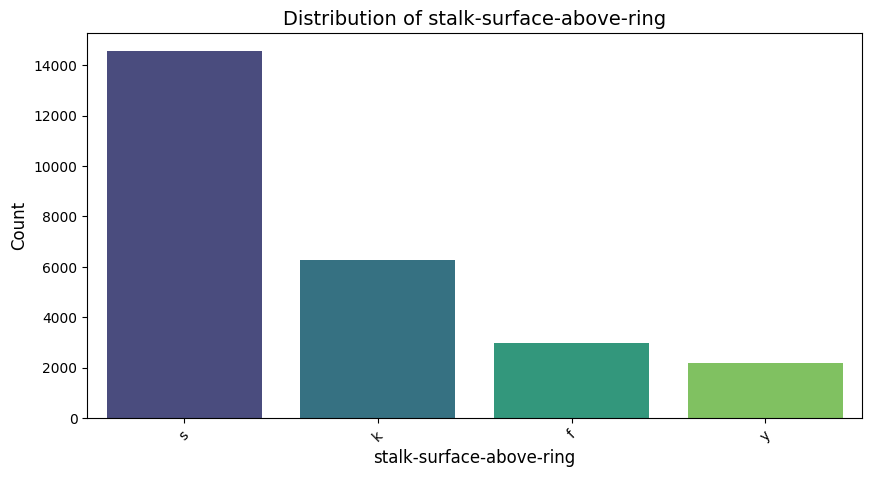

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


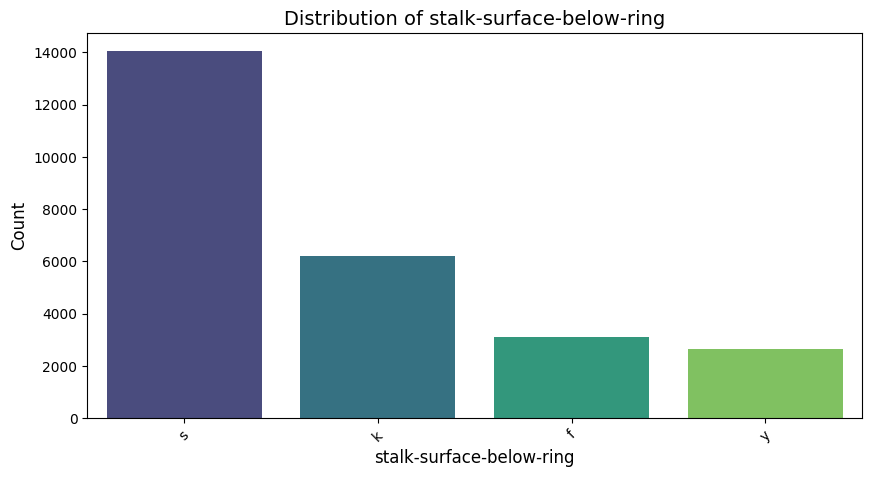

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


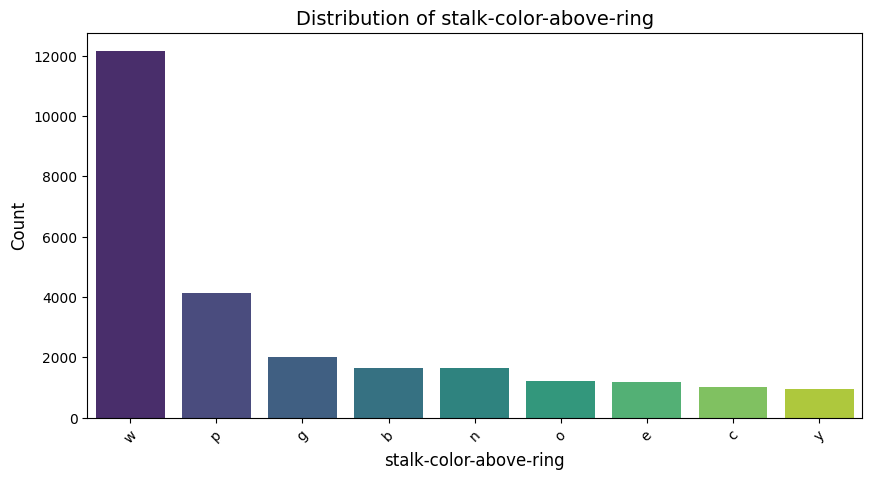

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


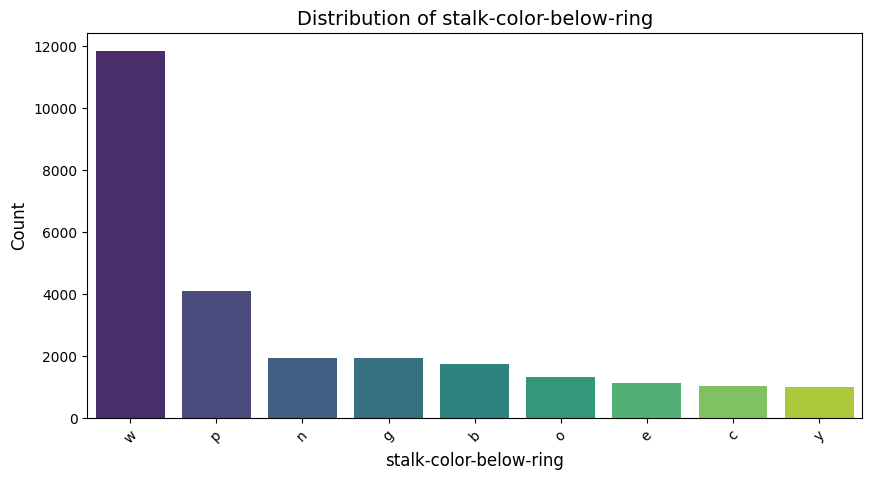

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


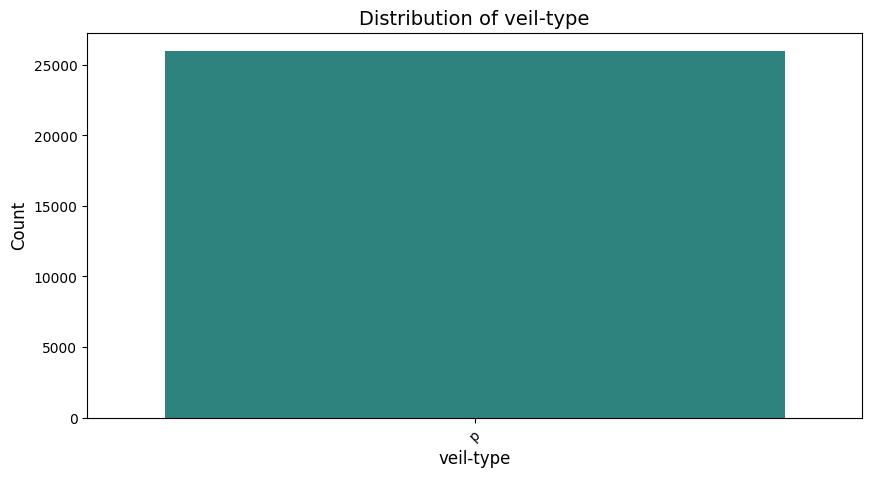

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


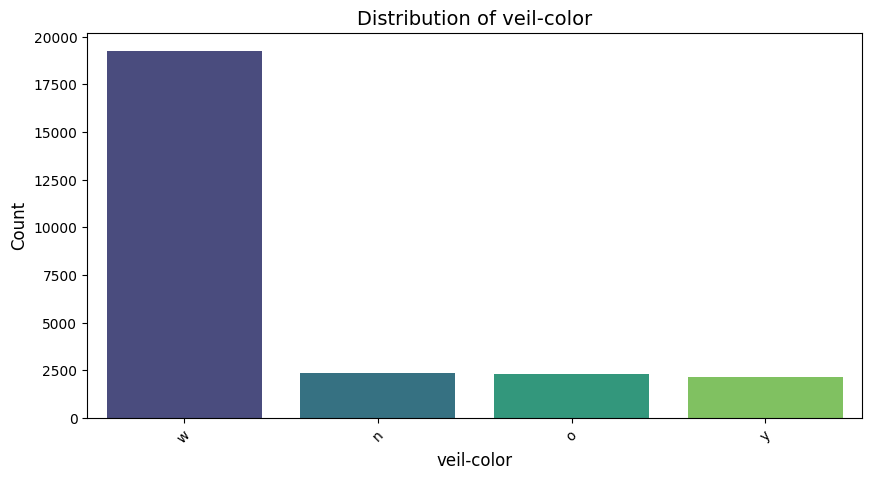

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


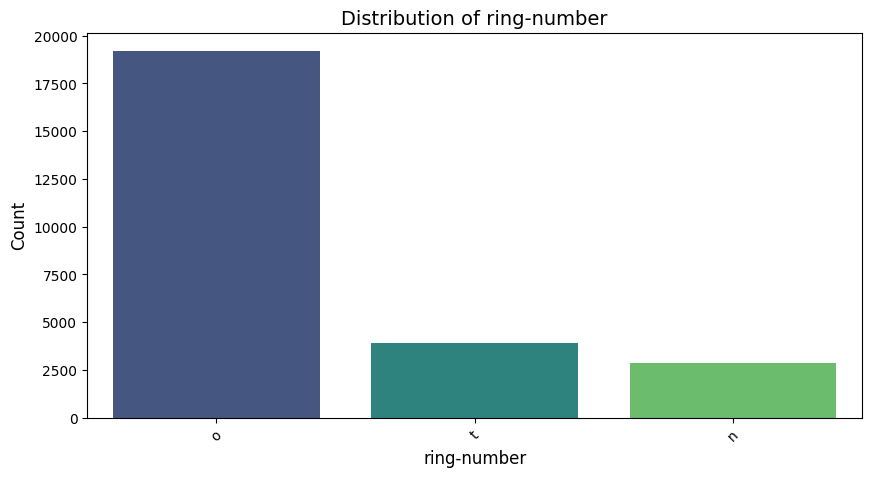

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


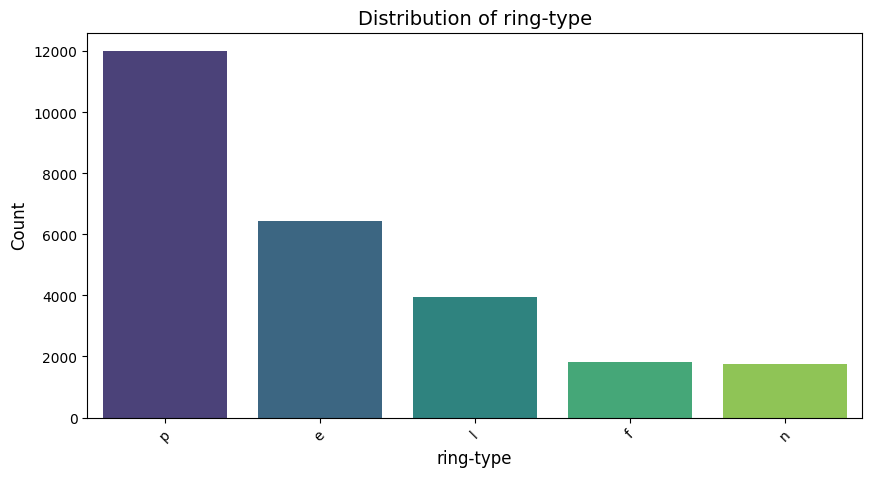

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


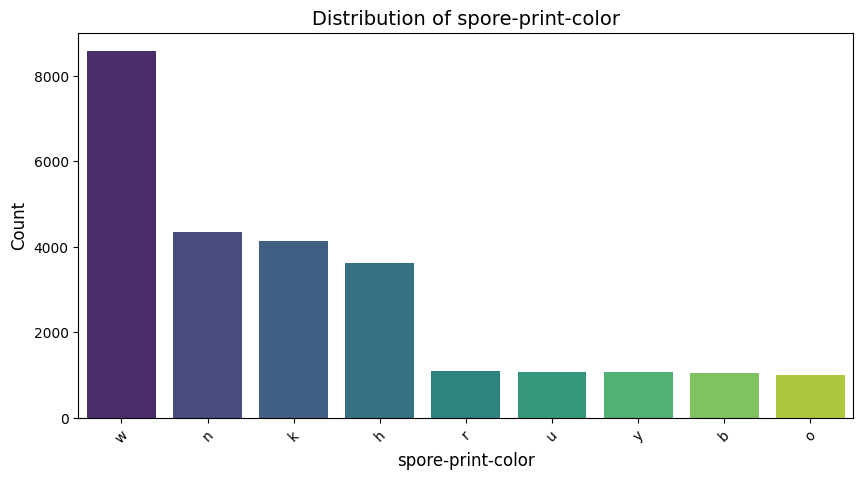

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


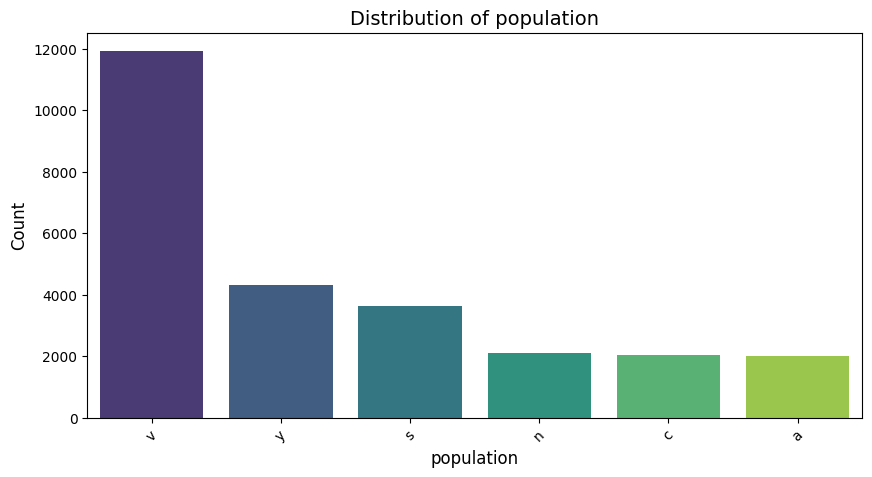

/tmp/ipython-input-3229763956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')


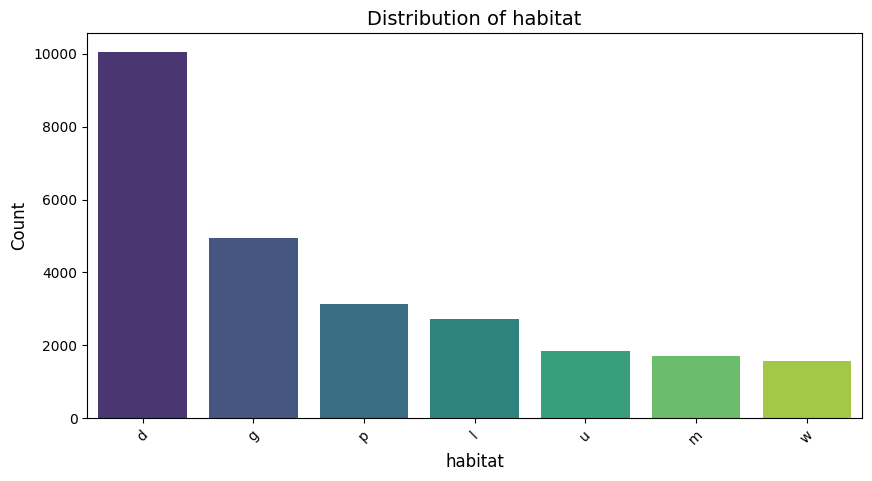

In [ ]:
cat_columns = df.select_dtypes(include=['object']).columns


for col in cat_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()


#**2. Bivariate Analysis**

2.5 GroupBy Aggregations

In [ ]:
# Shows count of target classes for each category in every feature.

target_col_cat = 'class'
cat_columns = df.select_dtypes(include='object').columns.drop(target_col_cat)

for col in cat_columns:
    print(f"\n--- GroupBy for {col} ---")
    cross_tab_counts = pd.crosstab(df[col], df[target_col_cat])
    print(cross_tab_counts)



--- GroupBy for cap-shape ---
class         e     p
cap-shape            
b          1336   924
c           802   675
f          3649  3073
k          1542  1370
s           812   656
x          6213  4934

--- GroupBy for cap-surface ---
class           e     p
cap-surface            
f            3670  2554
g            1195   966
s            3488  3032
y            6001  5080

--- GroupBy for cap-color ---
class         e     p
cap-color            
b           660   551
c           526   413
e          1834  1627
g          2226  1765
n          4616  3653
p           611   483
r           467   380
u           502   413
w          1452  1137
y          1460  1210

--- GroupBy for ruises ---
class      e     p
ruises            
f       8178  7655
t       6176  3977

--- GroupBy for odor ---
class     e     p
odor             
a      1027   643
c       626   671
f       700  3954
l       951   659
m       546   426
n      8164  2272
p       617   742
s       834  1153
y       889

2.6 Barplot (categorical vs target)

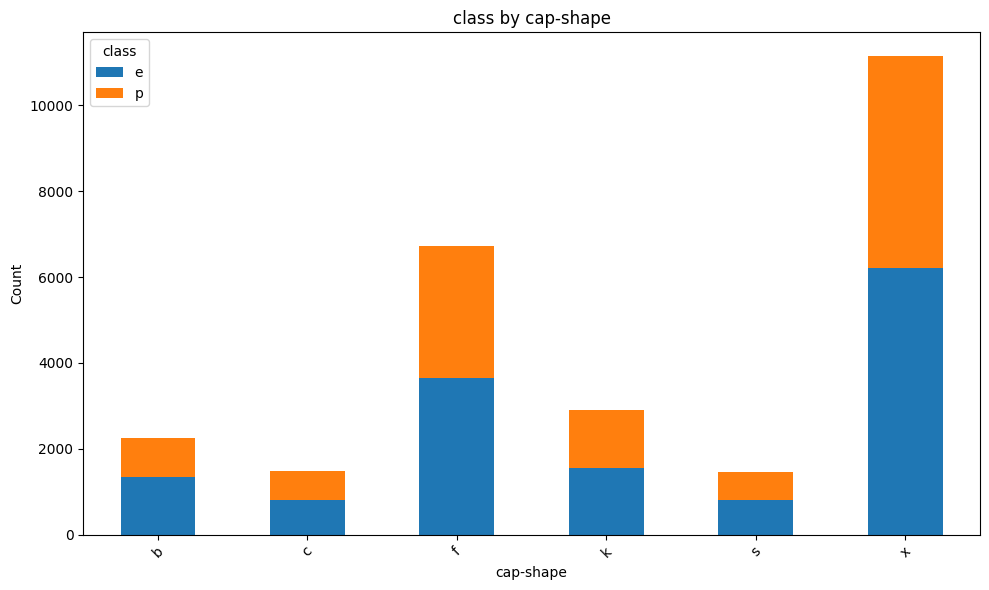

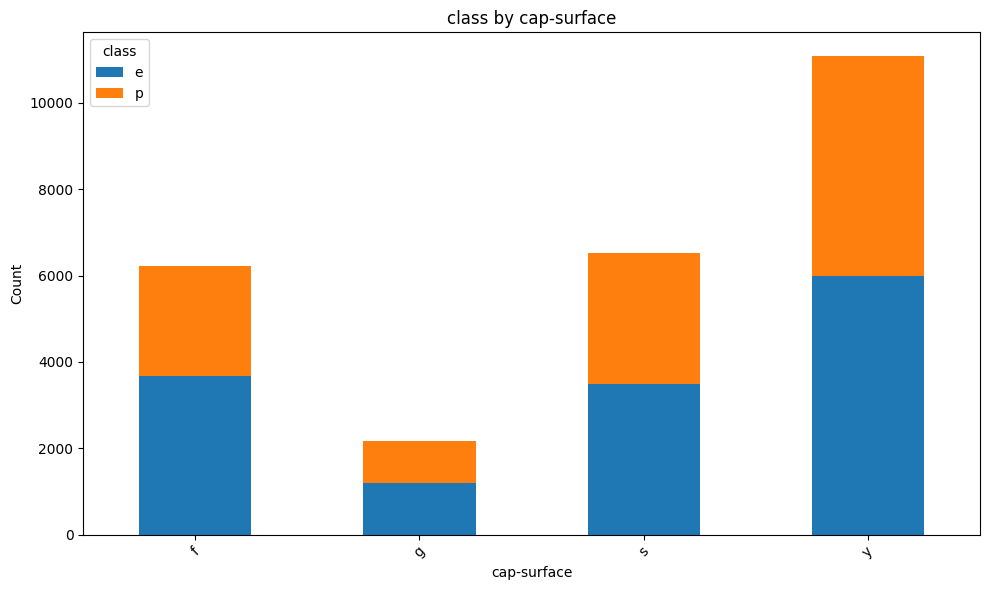

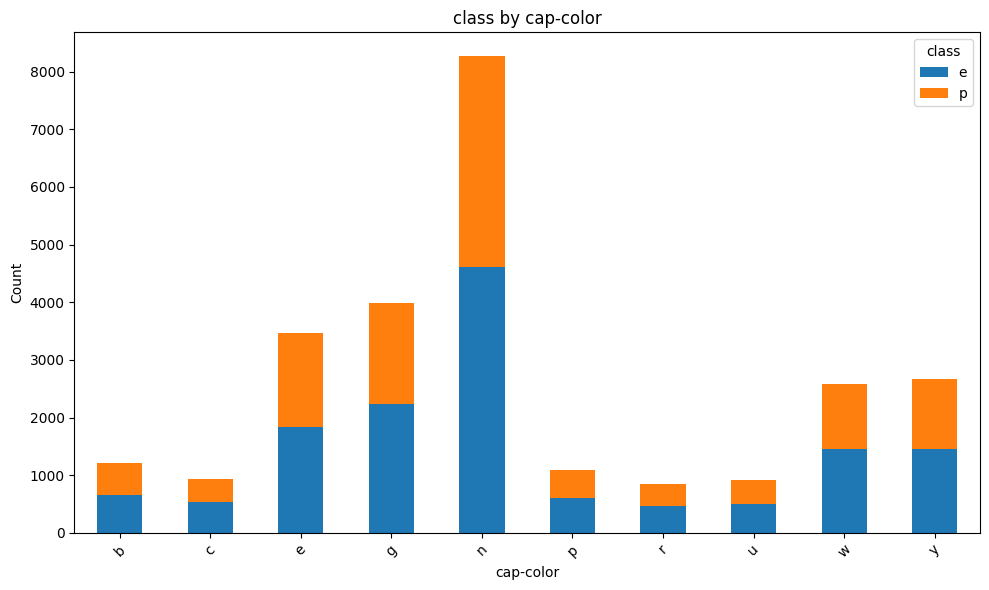

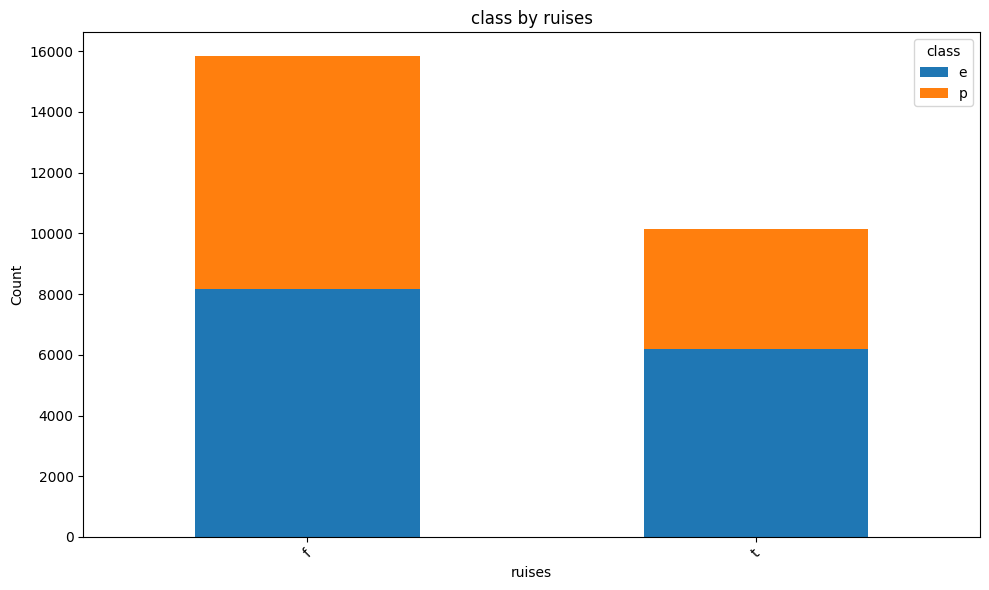

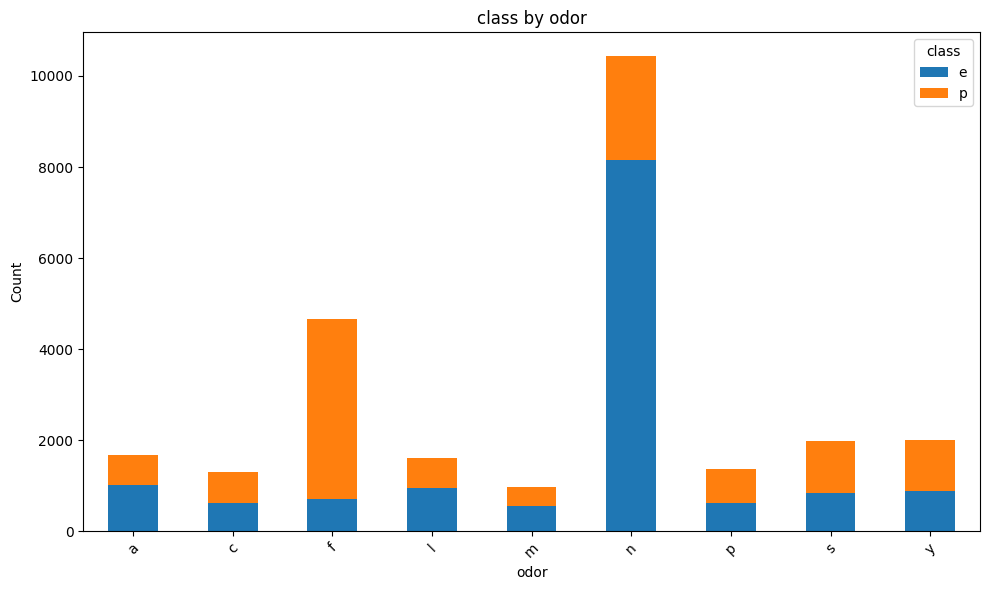

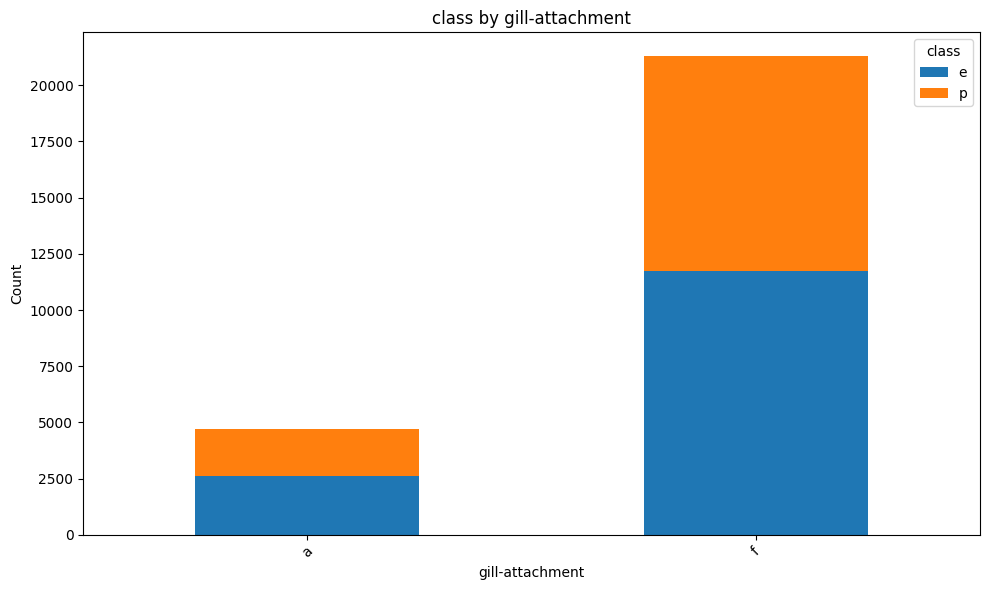

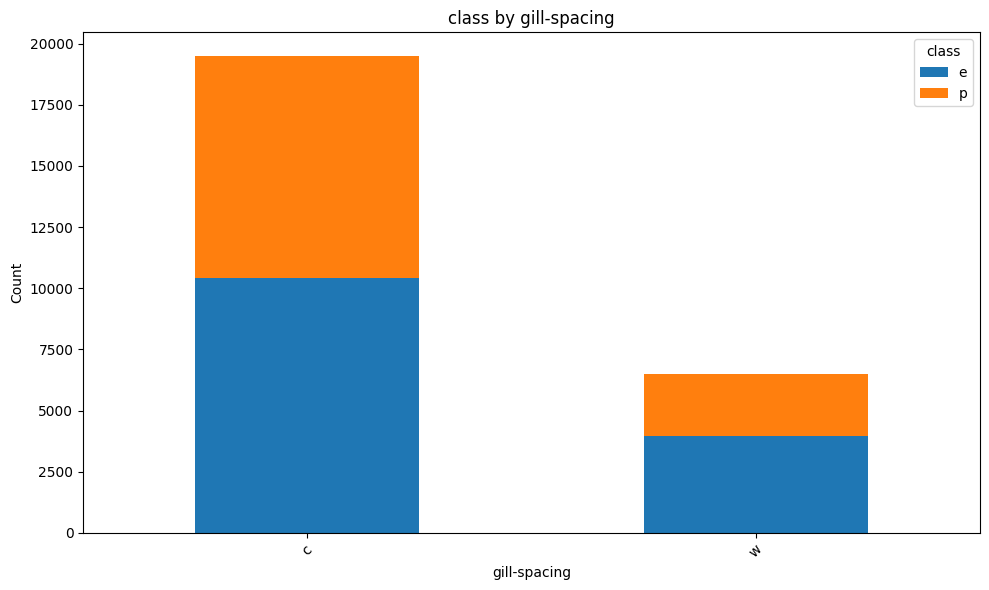

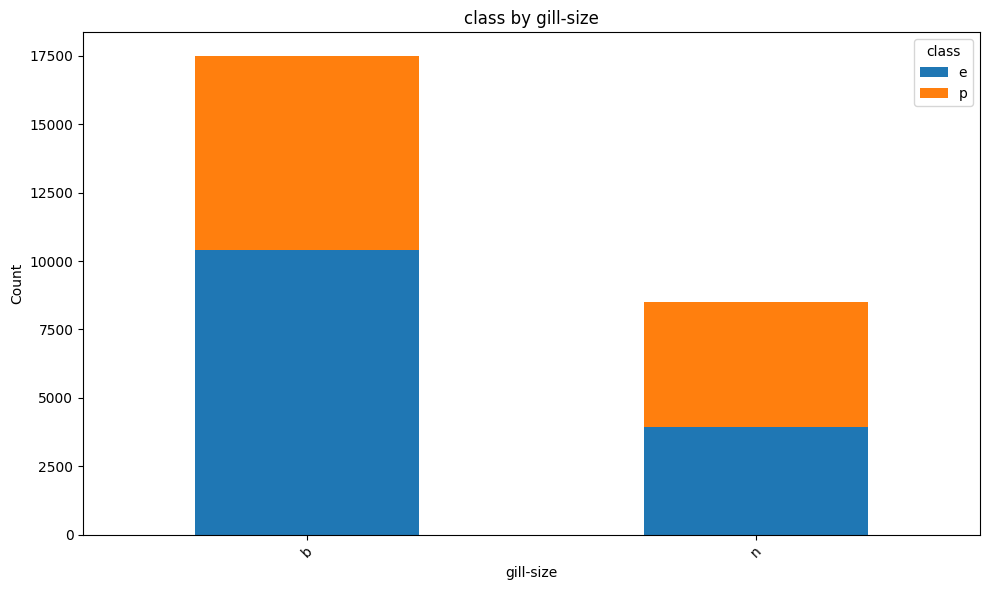

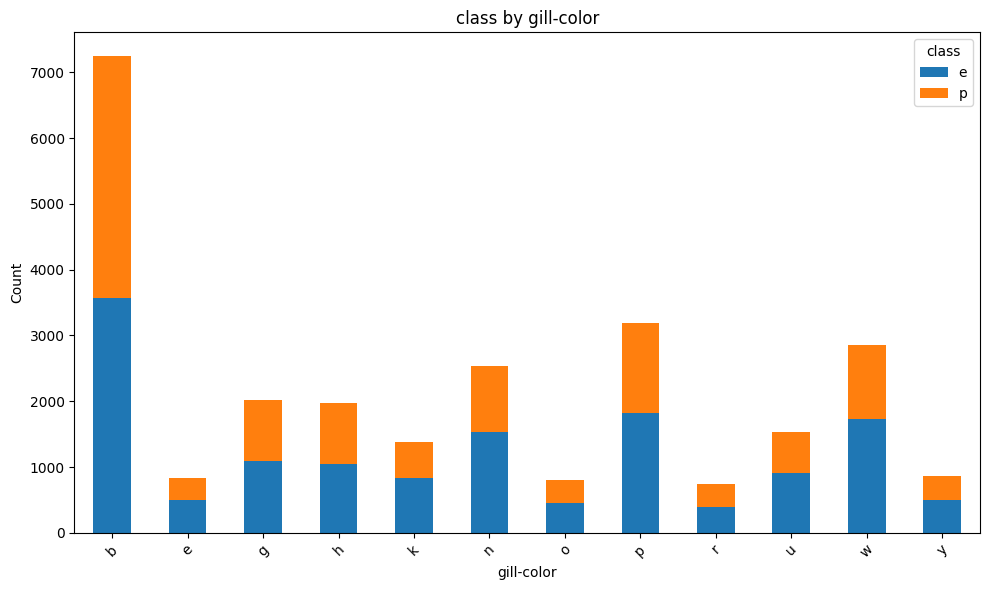

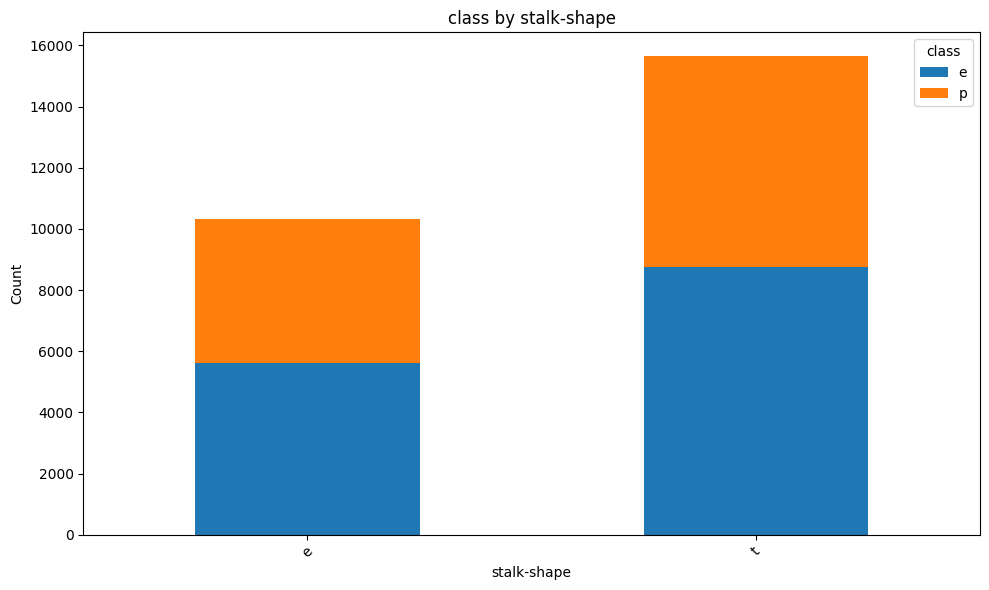

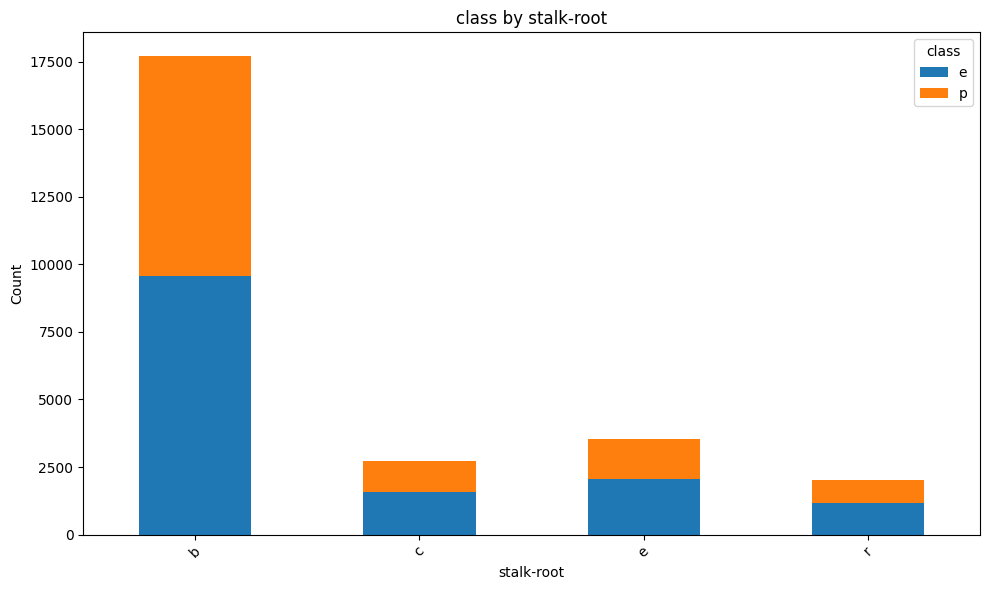

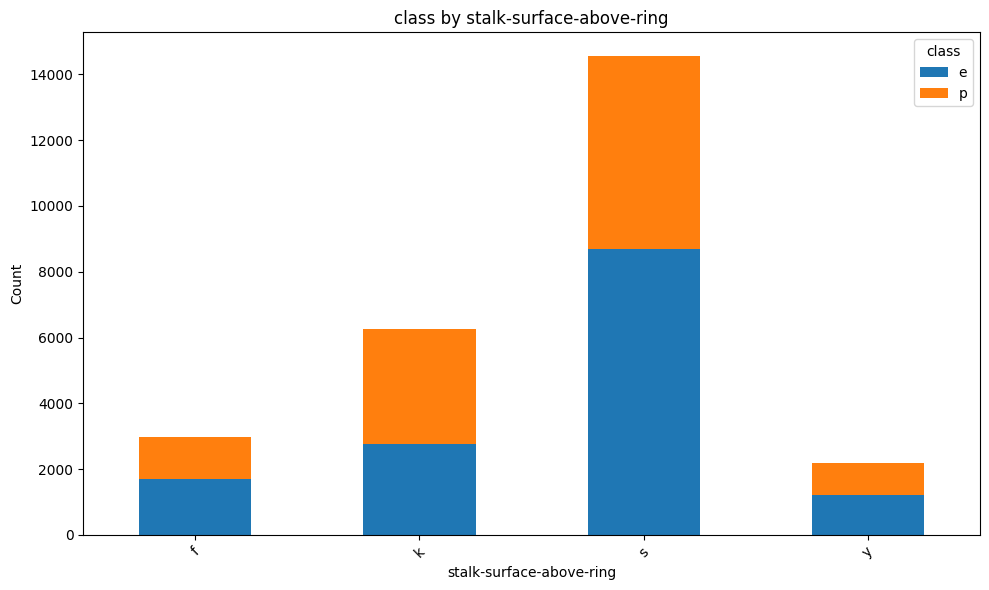

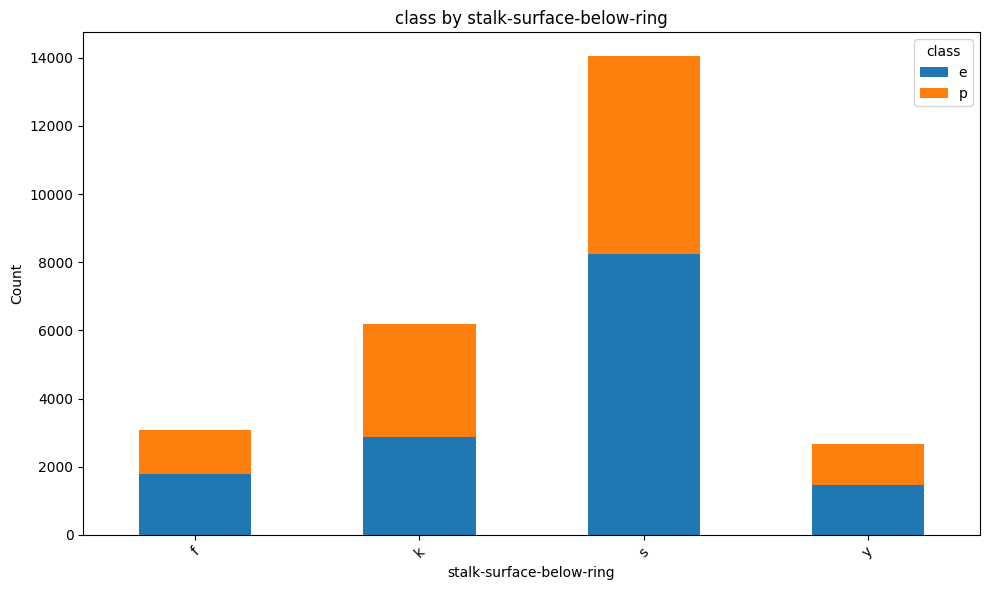

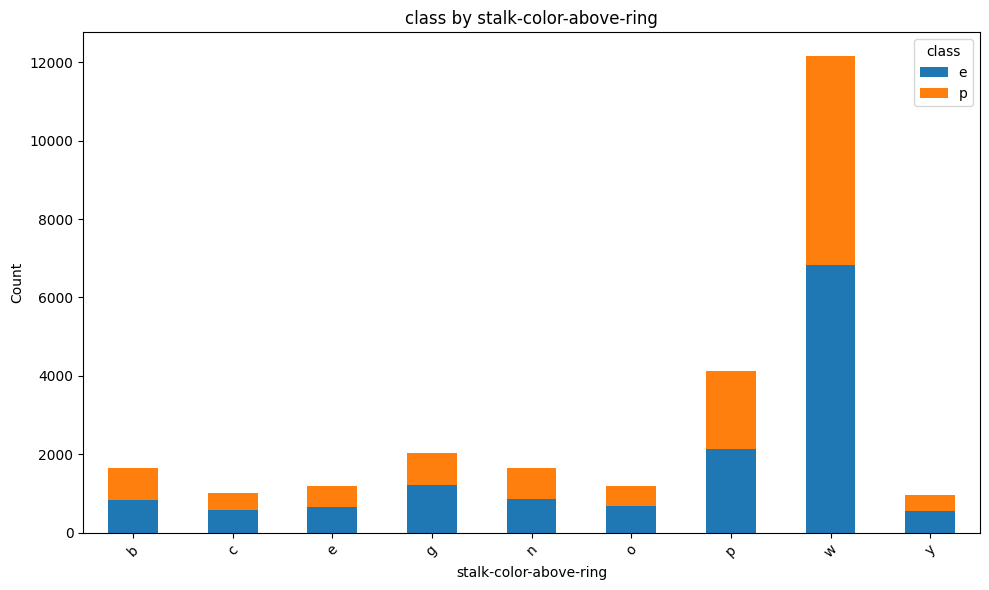

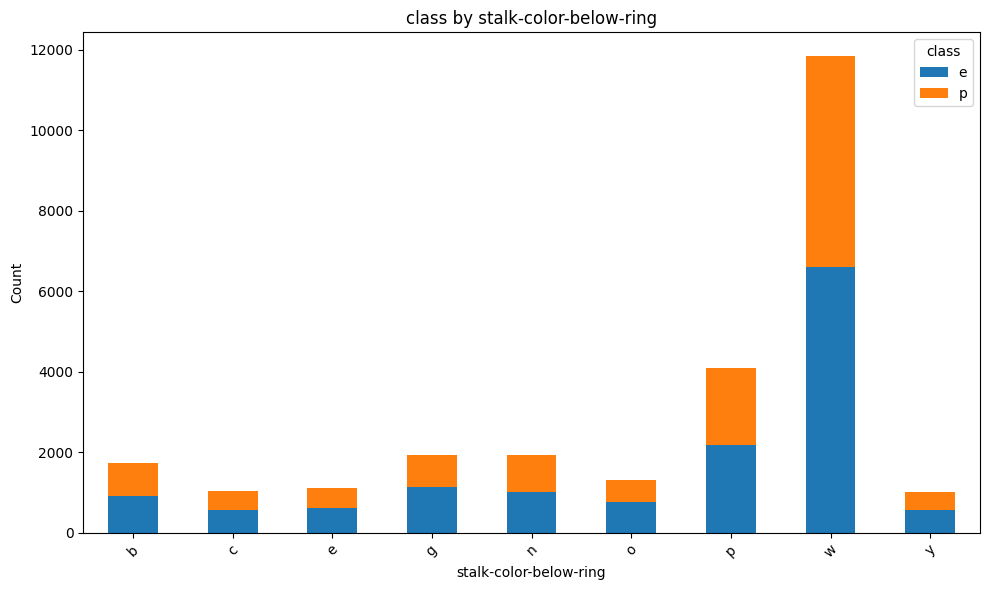

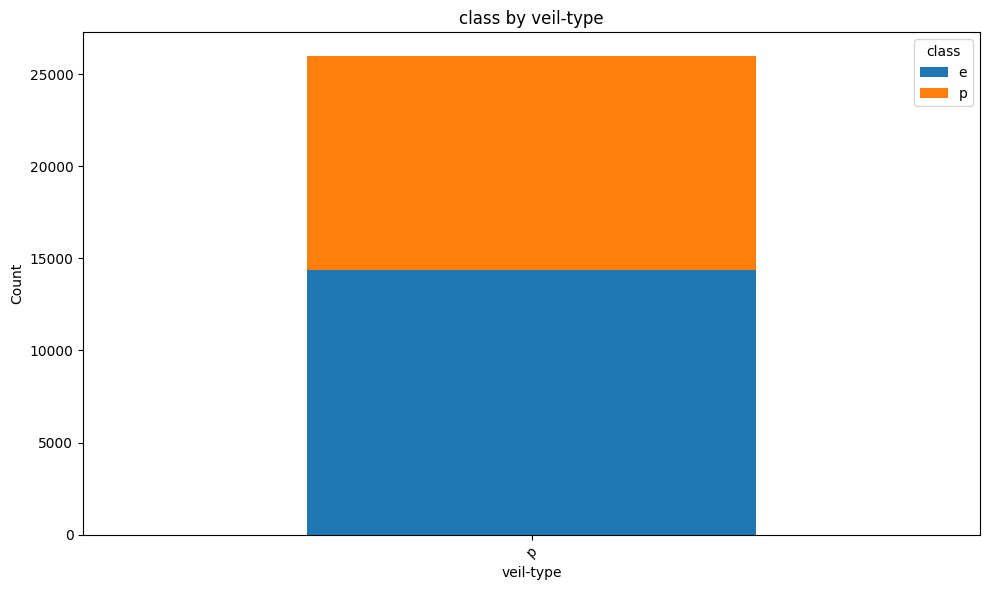

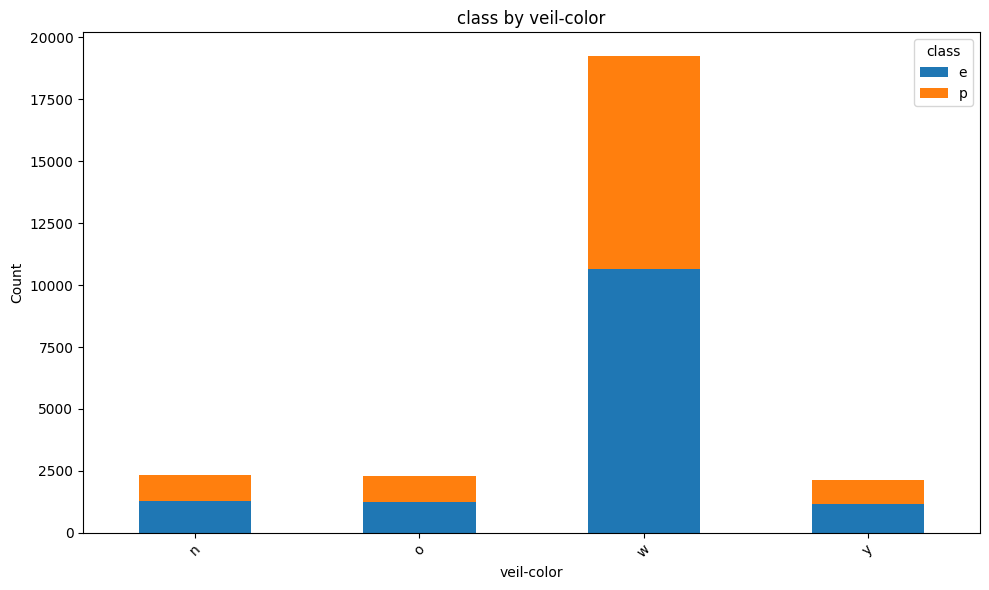

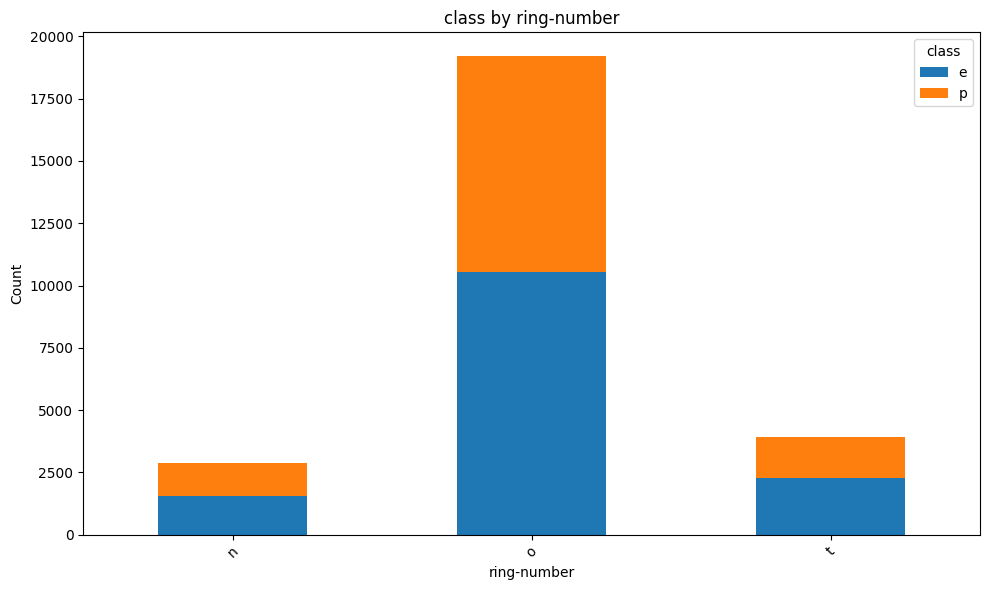

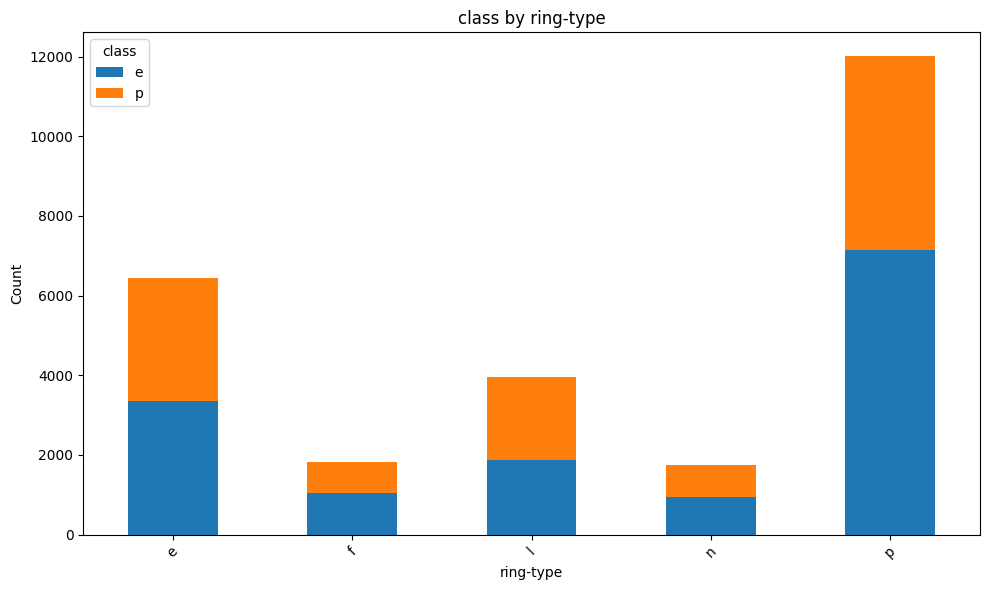

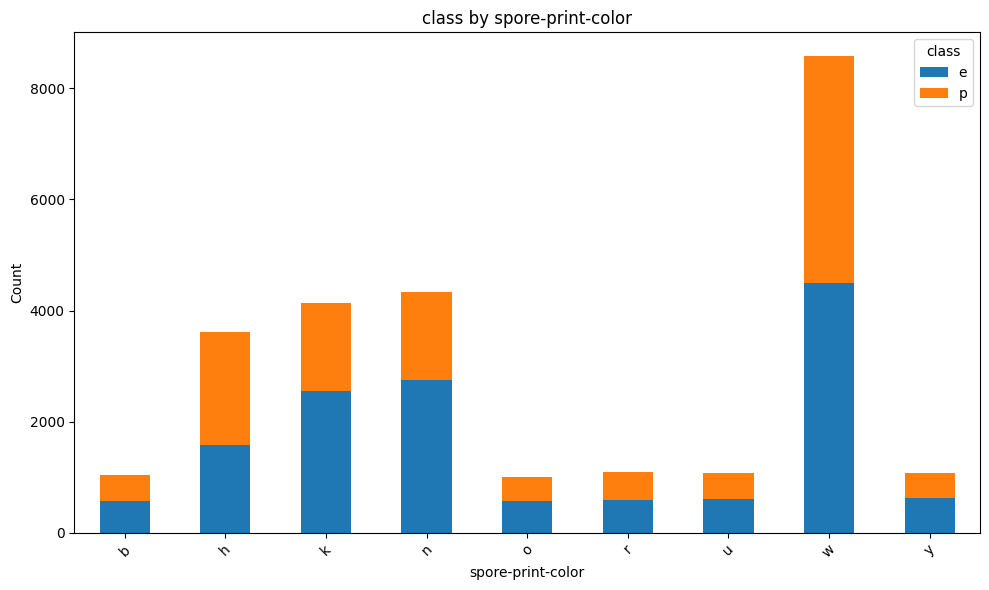

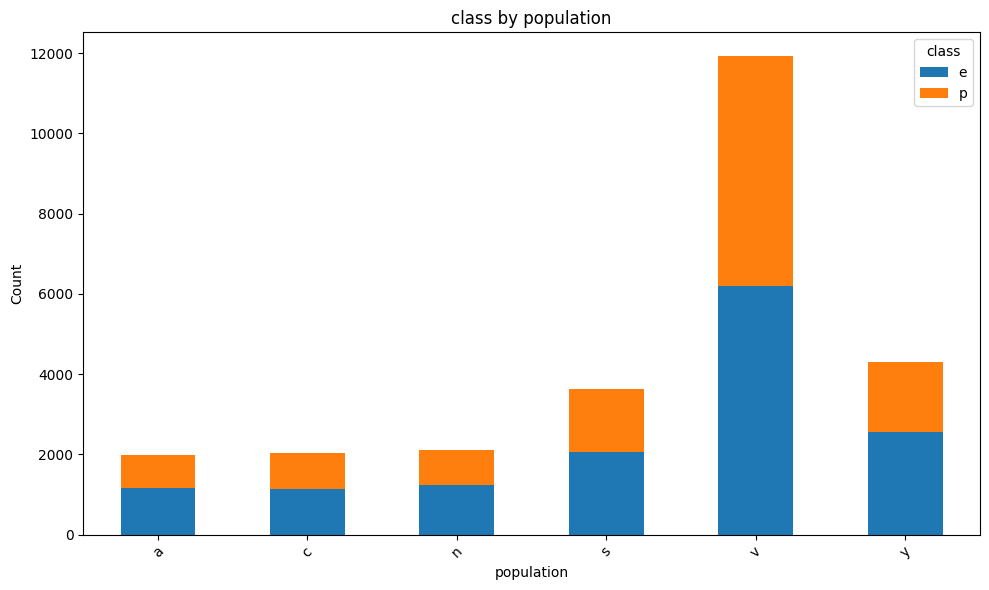

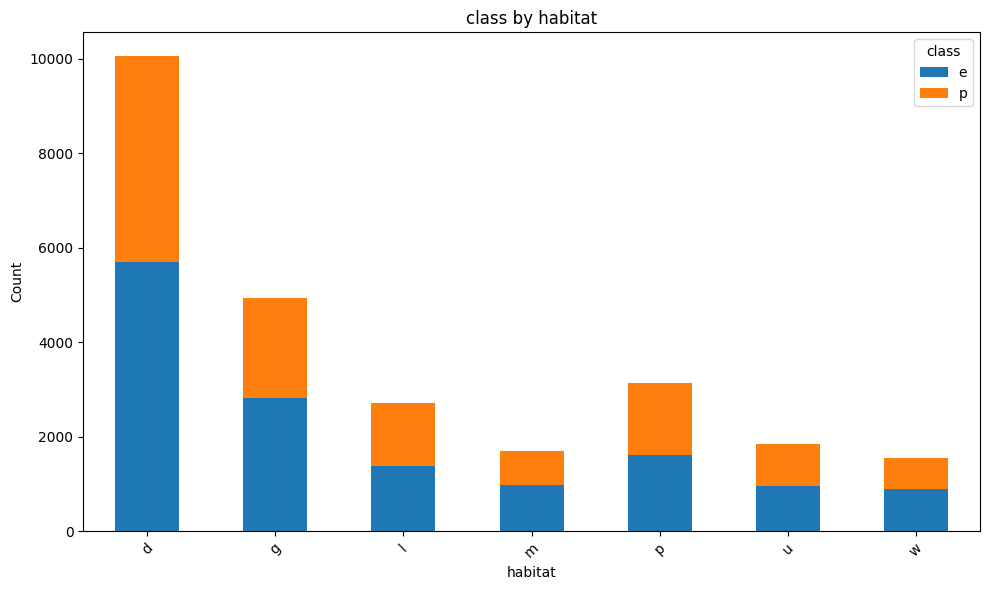

In [ ]:
# Stacked barplot to show relationship between each feature and the target.

target_col_cat = 'class'
cat_columns = df.select_dtypes(include='object').columns.drop(target_col_cat)

for col in cat_columns:
    cross_tab_counts = pd.crosstab(df[col], df[target_col_cat])

    plt.figure(figsize=(10, 6))
    cross_tab_counts.plot(kind='bar', stacked=True, ax=plt.gca())

    plt.title(f'{target_col_cat} by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#**4.Outliers Analysis & Data Quality Checks**

**4.1 Check logical validity**

In [ ]:
for col in df.columns:
    print("Column:", col)
    print(df[col].unique())
    print("----------------------")

Column: class
['e' 'p']
----------------------
Column: cap-shape
['x' 'b' 'f' 's' 'k' 'c']
----------------------
Column: cap-surface
['f' 'y' 'g' 's']
----------------------
Column: cap-color
['n' 'g' 'b' 'y' 'p' 'e' 'w' 'u' 'r' 'c']
----------------------
Column: ruises
['f' 't']
----------------------
Column: odor
['n' 'y' 'l' 'f' 'a' 's' 'p' 'm' 'c']
----------------------
Column: gill-attachment
['f' 'a']
----------------------
Column: gill-spacing
['w' 'c']
----------------------
Column: gill-size
['n' 'b']
----------------------
Column: gill-color
['b' 'k' 'n' 'p' 'y' 'g' 'w' 'h' 'r' 'u' 'o' 'e']
----------------------
Column: stalk-shape
['t' 'e']
----------------------
Column: stalk-root
['b' 'r' 'c' 'e']
----------------------
Column: stalk-surface-above-ring
['s' 'f' 'k' 'y']
----------------------
Column: stalk-surface-below-ring
['y' 's' 'k' 'f']
----------------------
Column: stalk-color-above-ring
['w' 'n' 'p' 'b' 'o' 'g' 'e' 'c' 'y']
----------------------
Column: stalk

**4.2 Identify rare categories**

In [ ]:
for col in df.columns:
    print("Column:", col)
    print(df[col].value_counts(normalize=True) * 100)
    print("----------------------")

Column: class
class
e    55.237436
p    44.762564
Name: proportion, dtype: float64
----------------------
Column: cap-shape
cap-shape
x    42.896175
f    25.867775
k    11.206034
b     8.696991
c     5.683830
s     5.649196
Name: proportion, dtype: float64
----------------------
Column: cap-surface
cap-surface
y    42.642192
s    25.090433
f    23.951358
g     8.316016
Name: proportion, dtype: float64
----------------------
Column: cap-color
cap-color
n    31.820981
g    15.358270
e    13.318710
y    10.274763
w     9.963057
b     4.660202
p     4.209959
c     3.613484
u     3.521127
r     3.259447
Name: proportion, dtype: float64
----------------------
Column: ruises
ruises
f    60.928962
t    39.071038
Name: proportion, dtype: float64
----------------------
Column: odor
odor
n    40.160086
f    17.909644
y     7.700300
s     7.646425
a     6.426537
l     6.195644
p     5.229739
c     4.991149
m     3.740476
Name: proportion, dtype: float64
----------------------
Column: gill-attachme

# **5.Insights & Reporting**

**1.Feature Importance**



In [ ]:
# --- 5.1 Feature Importance (Preliminary) ---
target = "class"

feature_importance = {}

for col in df.columns:
    if col != target:
        crosstab = pd.crosstab(df[col], df[target], normalize='index')
        diff = abs(crosstab.iloc[:,0] - crosstab.iloc[:,1]).mean()
        feature_importance[col] = diff

importance_df = pd.DataFrame(
    feature_importance.items(),
    columns=["Feature", "Importance_Score"]
).sort_values(by="Importance_Score", ascending=False)

print(importance_df)

                     Feature  Importance_Score
4                       odor          0.244133
6               gill-spacing          0.141432
10                stalk-root          0.139057
19         spore-print-color          0.138949
20                population          0.138747
11  stalk-surface-above-ring          0.135063
8                 gill-color          0.134674
7                  gill-size          0.130368
3                     ruises          0.124809
12  stalk-surface-below-ring          0.123804
1                cap-surface          0.109582
17               ring-number          0.108842
14    stalk-color-below-ring          0.108501
5            gill-attachment          0.105771
0                  cap-shape          0.105675
13    stalk-color-above-ring          0.104973
15                 veil-type          0.104749
2                  cap-color          0.103441
9                stalk-shape          0.101237
16                veil-color          0.100840
18           

**2.Automated EDA Report**

In [ ]:
# --- 5.2 Automated EDA Report (Optional) ---

# The report is generated using the cleaned DataFrame (df)
print("Starting generation of Automated EDA Report...")
profile = ProfileReport(
    df,
    title="Mushroom Dataset - Full EDA Report",
    html={'style': {'full_width': True}},
    sort=None
)

# Save the report as an interactive HTML file
report_filename = "mushroom_eda_report_full.html"
profile.to_file(report_filename)

print(f"\n✅ Automated EDA Report successfully generated: '{report_filename}'")
print("You can download the file from the Colab file explorer (left pane) and open it in your browser.")

Starting generation of Automated EDA Report...


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 23/23 [00:02<00:00, 10.49it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


✅ Automated EDA Report successfully generated: 'mushroom_eda_report_full.html'
You can download the file from the Colab file explorer (left pane) and open it in your browser.


## **3. Write EDA Summary & Key Findings**



**4.visualization dashboard**

/tmp/ipython-input-3264926819.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-3264926819.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/tmp/ipython-input-3264926819.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')


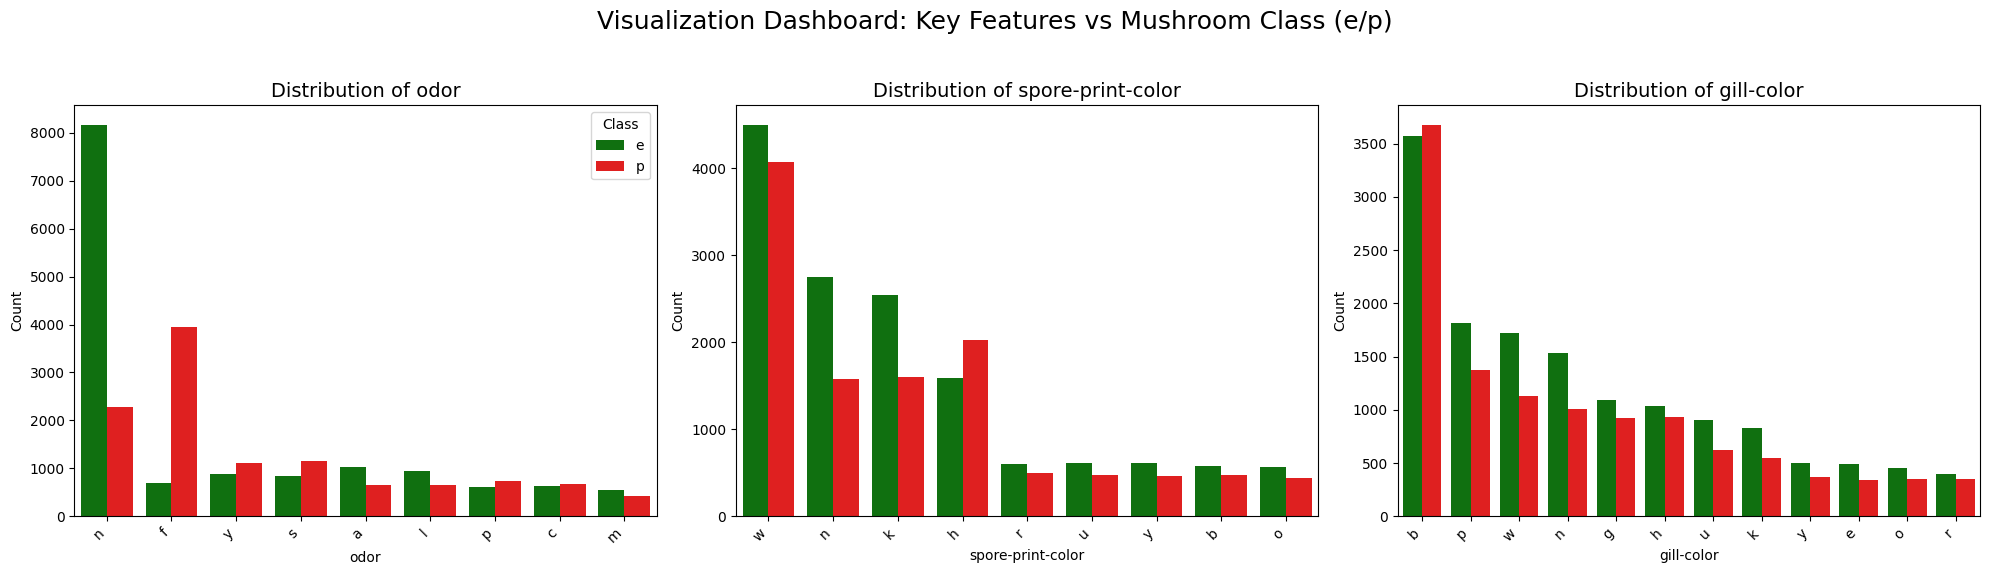

✅ Visualization Dashboard successfully created.


In [ ]:
## 5.4 Create Visualization Dashboard (Key Bivariate Relationships)

# df is the cleaned DataFrame (after imputation/data cleaning).

# Define the top discriminative features identified in the Feature Importance step.
features_to_plot = ['odor', 'spore-print-color', 'gill-color']
target_col = 'class'

# Setup the subplot environment: 1 row, 3 columns for the three key features
fig, axes = plt.subplots(nrows=1, ncols=len(features_to_plot), figsize=(20, 6))
fig.suptitle('Visualization Dashboard: Key Features vs Mushroom Class (e/p)', fontsize=18)
#

for i, col in enumerate(features_to_plot):
    # Use Countplot to show the joint distribution of Edible (e) vs. Poisonous (p) for each category.
    # The 'order' ensures categories are sorted by frequency (descending).
    sns.countplot(
        x=df[col],
        hue=df[target_col],
        ax=axes[i],
        order=df[col].value_counts().index,
        palette={'e': 'green', 'p': 'red'}  # Custom colors for clear distinction
    )

    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

    # Correct method for setting rotated label properties with alignment
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

    # Hide the legend from all plots except the first one for a cleaner dashboard view
    if i != 0:
        axes[i].legend().set_visible(False)
    else:
        axes[i].legend(title='Class')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

print("✅ Visualization Dashboard successfully created.")

# **4) - Data Preprocessing**


# **Encoding Categorical Variables**


In [ ]:
df_encoded = df.copy()

label_encoders = {}
for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [ ]:
df_encoded.head(10)

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,5,0,4,0,5,1,1,1,0,...,3,7,6,0,0,1,4,7,4,0
1,1,5,3,3,1,5,1,0,0,4,...,2,4,1,0,2,0,0,7,5,1
2,0,0,3,4,1,5,1,0,0,5,...,2,6,7,0,2,1,4,0,5,6
3,0,5,1,3,1,5,1,1,0,5,...,2,6,7,0,2,0,3,7,4,0
4,0,5,0,4,1,5,0,1,1,5,...,1,7,7,0,2,1,2,7,4,0
5,1,2,2,3,0,8,0,0,1,7,...,1,7,4,0,1,1,4,3,4,0
6,1,2,2,0,1,3,1,0,0,7,...,0,7,1,0,2,0,4,6,4,5
7,1,2,0,9,0,2,1,0,0,7,...,2,0,0,0,2,1,2,0,5,4
8,0,4,0,5,1,5,0,1,0,11,...,2,0,7,0,2,1,2,7,2,0
9,0,2,3,4,0,0,1,0,0,2,...,0,7,7,0,2,1,3,2,2,2


In [ ]:
X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]

# **Data is linear or non-linear**

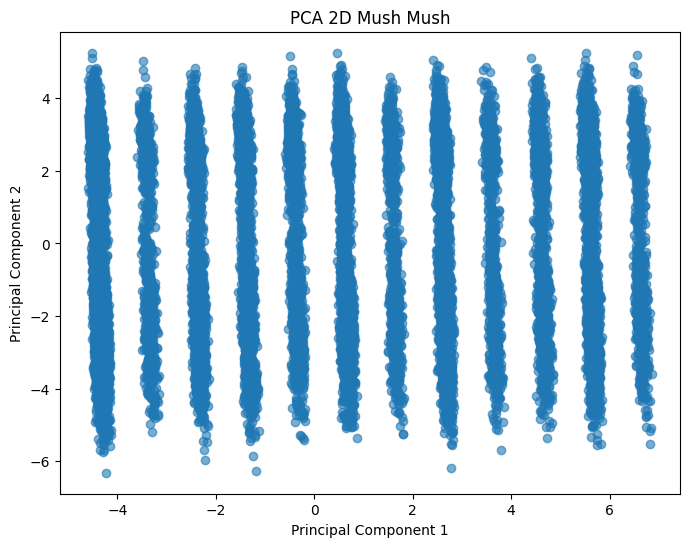

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
plt.title("PCA 2D Mush Mush")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# **Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **5)Build and Train Model**


##**1.Pipeline Construction**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("pass", "passthrough", X_train.columns)
    ],
    remainder="drop"
)

rf = RandomForestClassifier(random_state=42,class_weight="balanced" )

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", rf)
])

##**2.Training & Hyperparameter Tuning**

In [ ]:
param_grid = {
    'classifier__n_estimators': [200, 300],
    'classifier__max_depth': [None, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    model,
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='f1_weighted'   # 🔹 بدل accuracy
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

print("Best CV Score:", grid.best_score_)
print("Best Parameters:", grid.best_params_)

Best CV Score: 0.7343682690238822
Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}


#6) Model Evaluation

In [ ]:
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.7235475182762601

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      2871
           1       0.71      0.64      0.67      2327

    accuracy                           0.72      5198
   macro avg       0.72      0.72      0.72      5198
weighted avg       0.72      0.72      0.72      5198



##Confusion Matrix

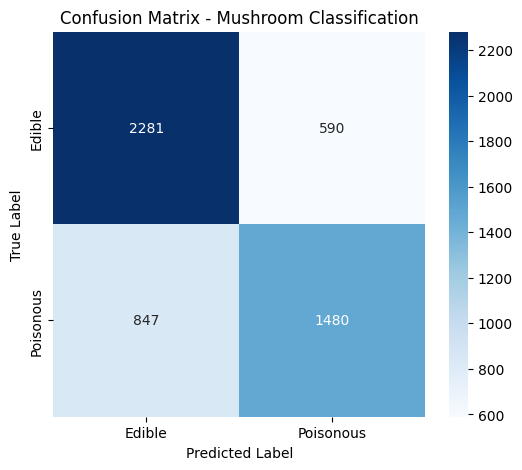

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Edible", "Poisonous"],
    yticklabels=["Edible", "Poisonous"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Mushroom Classification")
plt.show()

Feature Importance


--- Final Model Feature Importance Analysis ---
Top 10 Most Important Features (from best_model):
--------------------------------------------------
odor                      0.255191
gill-color                0.066735
cap-color                 0.059892
spore-print-color         0.058822
stalk-color-below-ring    0.051587
habitat                   0.051443
stalk-color-above-ring    0.050294
cap-shape                 0.045607
population                0.045598
ring-type                 0.039821
dtype: float64


/tmp/ipython-input-3377933721.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


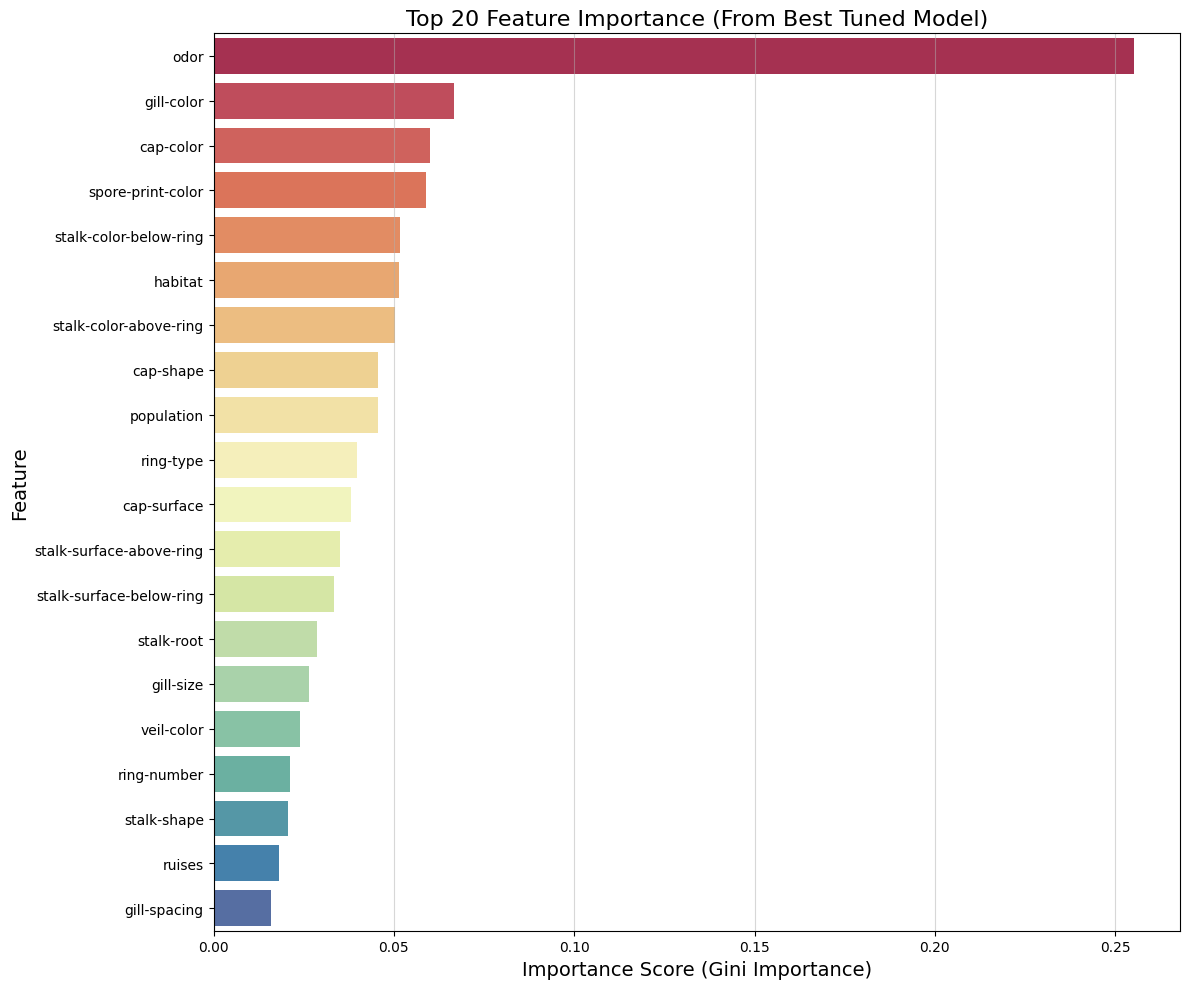

In [ ]:
rf_classifier = best_model.named_steps['classifier']

# Because we used passthrough, feature names = original columns after encoding
feature_names = X_train.columns

# Calculate importance scores
importances = rf_classifier.feature_importances_

# Create a sorted Series
feature_importance_df = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print("\n--- Final Model Feature Importance Analysis ---")
print("Top 10 Most Important Features (from best_model):")
print("--------------------------------------------------")
print(feature_importance_df.head(10))

# Plot top 20
plt.figure(figsize=(12, 10))
sns.barplot(
    x=feature_importance_df.head(20).values,
    y=feature_importance_df.head(20).index,
    palette="Spectral"
)

plt.title('Top 20 Feature Importance (From Best Tuned Model)', fontsize=16)
plt.xlabel('Importance Score (Gini Importance)', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.grid(axis='x', alpha=0.5)
plt.tight_layout()
plt.show()

#7) Save Deployment Model In Streamlit

In [ ]:
import joblib

# Save the full best model pipeline
joblib.dump(best_model, "mushroom_model.pkl")

!zip model.zip mushroom_model.pkl
from google.colab import files
files.download("model.zip")


print("Model Saved Successfully!")


  adding: mushroom_model.pkl (deflated 78%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model Saved Successfully!


In [ ]:
import joblib

joblib.dump(label_encoders, "label_encoders.pkl")
print("✅ Label Encoders saved successfully.")

✅ Label Encoders saved successfully.


to download this file on pc

#**Final - algorithm test**


##**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", dt)
])

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

print("Best Score:", grid.best_score_)
print("Best Params:", grid.best_params_)
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best Score: 0.7211855660977624
Best Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Test Accuracy: 0.7200846479415159
              precision    recall  f1-score   support

           0       0.72      0.82      0.76      2871
           1       0.73      0.60      0.66      2327

    accuracy                           0.72      5198
   macro avg       0.72      0.71      0.71      5198
weighted avg       0.72      0.72      0.72      5198

